#xyz

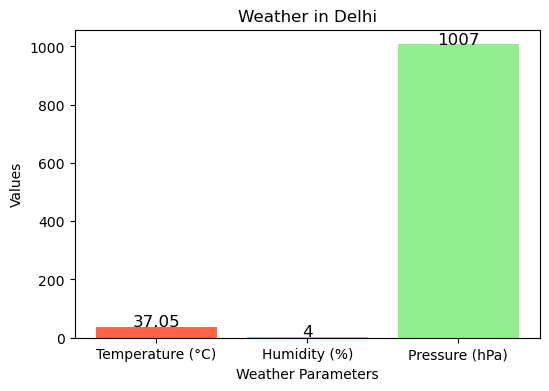

In [14]:
#import libraries
import requests
import matplotlib.pyplot as plt

# define API Key
API_KEY = "3cd0013f54204a33b94437a2099e59e9"

CITY = "Delhi"

# Fetch data
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"
response = requests.get(URL)
data = response.json()

if response.status_code == 200:
    
    temperature = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    pressure = data["main"]["pressure"]
    
    # Plot Bar Chart using matplotlib
    labels = ["Temperature (°C)", "Humidity (%)", "Pressure (hPa)"]
    values = [temperature, humidity, pressure]
    colors = ["tomato", "skyblue", "lightgreen"]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, values, color=colors)
    plt.xlabel("Weather Parameters")
    plt.ylabel("Values")
    plt.title(f"Weather in {CITY}")
    
    
    for i, v in enumerate(values):
        plt.text(i, v + 1, str(v), ha="center", fontsize=12)

    plt.show()
    
else:
    print("Error fetching data:", data.get("message", "Unknown error"))


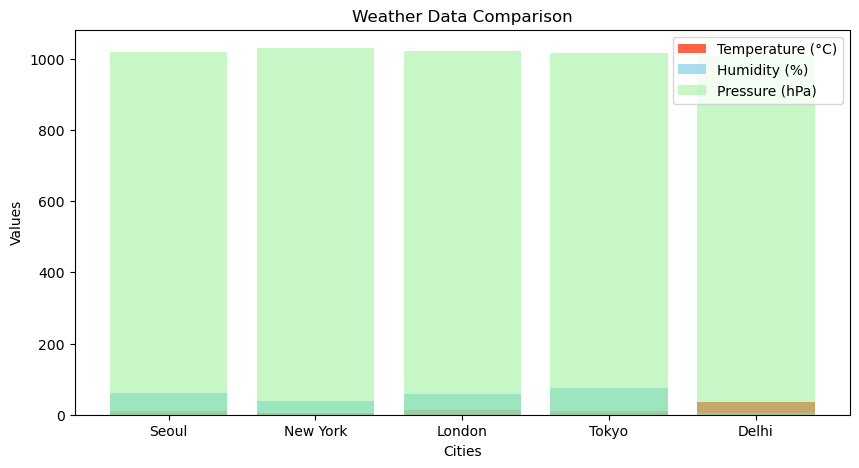

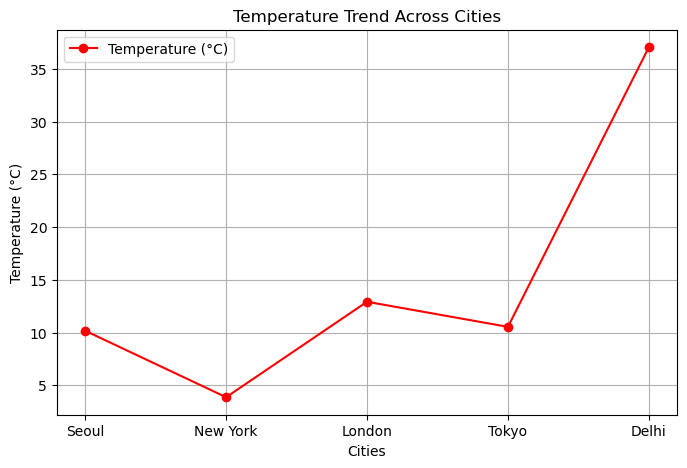

In [13]:
#import libraries
import requests
import matplotlib.pyplot as plt

# define the api key
API_KEY = "3cd0013f54204a33b94437a2099e59e9"

# list the cities
cities = ["Seoul", "New York", "London", "Tokyo", "Delhi"]

# API request
def get_weather(city):
    URL = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(URL)
    data = response.json()
    if response.status_code == 200:
        return {
            "city": city,
            "temp": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "pressure": data["main"]["pressure"]
        }
    else:
        print(f"Error fetching {city}: {data.get('message', 'Unknown error')}")
        return None

# Fetch data
weather_data = [get_weather(city) for city in cities]
weather_data = [w for w in weather_data if w]  # Remove None values

city_names = [w["city"] for w in weather_data]
temps = [w["temp"] for w in weather_data]
humidity = [w["humidity"] for w in weather_data]
pressure = [w["pressure"] for w in weather_data]

# Plot 1: Temperature, Humidity, and Pressure (Bar Chart)
plt.figure(figsize=(10, 5))
plt.bar(city_names, temps, color="tomato", label="Temperature (°C)")
plt.bar(city_names, humidity, color="skyblue", label="Humidity (%)", alpha=0.7)
plt.bar(city_names, pressure, color="lightgreen", label="Pressure (hPa)", alpha=0.5)
plt.xlabel("Cities")
plt.ylabel("Values")
plt.title("Weather Data Comparison")
plt.legend()
plt.show()

# Plot 2: Temperature Trend Across Cities (Line Chart)
plt.figure(figsize=(8, 5))
plt.plot(city_names, temps, marker="o", linestyle="-", color="red", label="Temperature (°C)")
plt.xlabel("Cities")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Across Cities")
plt.legend()
plt.grid()
plt.show()
